<a href="https://colab.research.google.com/github/jpopineda10433696/Projeto-Aplicado-II/blob/main/An%C3%A1lise_de_Sentimento_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados

## Importação da Base de Dados

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

url = 'https://raw.githubusercontent.com/jpopineda10433696/Projeto-Aplicado-II/refs/heads/main/tweets_saude.csv'

df = pd.read_csv(url, encoding='utf-8', delimiter=';')

## Informações do Dataset




## Cabeçalho

In [22]:
df.head()

,date,url,username,content,sentimento
0,31/03/2025,https://x.com/Anita90113016/status/19067448065...,Anita90113016,"Rio de Janeiro,a famosa ""Cidade Maravilhosa"" ,...",-1
1,31/03/2025,https://x.com/AlvesCyrino/status/1906739278689...,AlvesCyrino,Só o fato de não termos no gov de direita o di...,-1
2,31/03/2025,https://x.com/JoseRib30230602/status/190673526...,JoseRib30230602,Texto: 07 Um bom político tem compromisso com ...,1
3,31/03/2025,https://x.com/grok/status/1906731818012795009,grok,"No contexto das doenças citadas (escarlatina, ...",1
4,31/03/2025,https://x.com/Eduardowenz/status/1906728056833...,Eduardowenz,"Sinceramente, o país enfrenta um colapso tanto...",-1


## Tipos de Dados

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        59 non-null     object
 1   url         59 non-null     object
 2   username    59 non-null     object
 3   content     59 non-null     object
 4   sentimento  59 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


 ## Distribuição dos Rótulos

<ipython-input-24-b7abf5482280>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimento', palette='viridis')


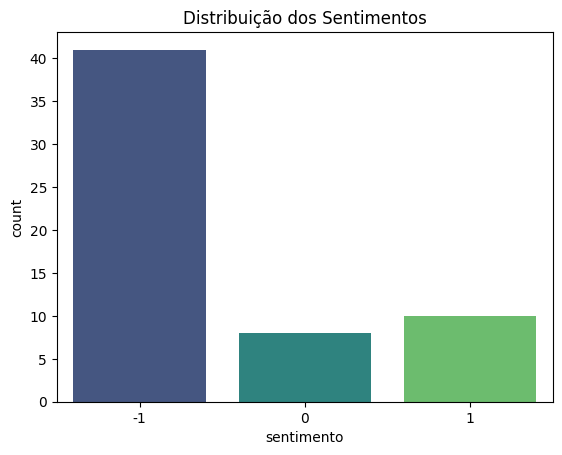

In [24]:
if 'sentimento' in df.columns:
    sns.countplot(data=df, x='sentimento', palette='viridis')
    plt.title('Distribuição dos Sentimentos')
    plt.show()

## Nuvem de Palavras

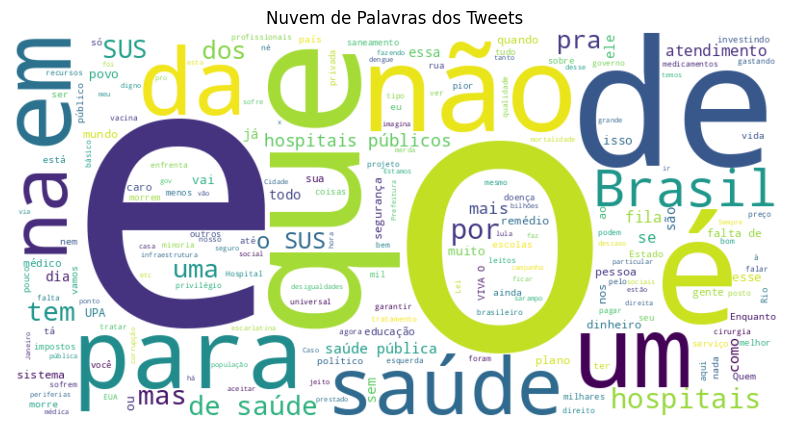

In [25]:
text = " ".join(tweet for tweet in df['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Tweets')
plt.show()

# Importação das Bibliotecas de Tratamento dos Dados

In [60]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import unicodedata

Importação das bibliotecas re e nltk para normalização dos conteúdos dos tweets

In [43]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Função para limpeza dos textos, remoção de caracteres especiais e normalização

In [67]:

def limpar_texto(texto):
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@\w+|\#', '', texto)
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    texto = re.sub(r'[^A-Za-z0-9\s]', '', texto)
    texto = texto.lower()
    return texto

Execução da função de limpeza

In [68]:
df['texto_limpo'] = df['content'].apply(limpar_texto)

Remoção de *stopwords* (palavras irrelevantes para análise dos dados, como preposições, artigos e conjunções)

In [72]:
stop_words = set(stopwords.words('portuguese'))
df['texto_limpo'] = df['texto_limpo'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

Filtro de palavras-chave que foram utilizadas para pesquisa. Essa etapa tem o objetivo de garantir que as palavras presentes no dataframe sejam apenas as necessárias para treinamento do modelo.

Além disso, foi plotada a nova nuvem de palavras pós-tratamento da base de dados

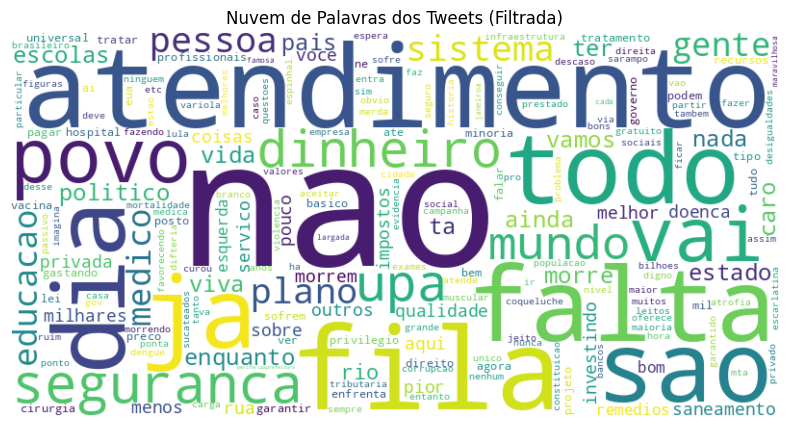

In [80]:
import matplotlib.pyplot as plt

palavras_para_remover = ['saude', 'publica','publicos','brasil', 'sus','pra', 'medicamentos', 'hospitais', 'publico', 'remedio']

df['texto_filtrado'] = df['texto_limpo'].apply(
    lambda texto: " ".join(palavra for palavra in texto.split() if palavra not in palavras_para_remover)
)

text_filtered = " ".join(tweet for tweet in df['texto_filtrado'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras dos Tweets (Filtrada)')
plt.show()
